In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const
import sympy as sp
sp.init_printing() 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

'''
think of line of sight as cylinder with radius r = r_star and distance l. We are solving for l.

volume of cylinder * density = 1
'''

# Luminosity 
L = const.L_sun

#defining Mpc unit
Mpc = u.def_unit('Mpc', u.pc * 10**6)

#Number Density
n = (10**9)/(u.Mpc)**3

#radius
r_star= 7*(10**8)*u.m

# np.pi * (r_star)**2 * l * n = 1; solve for l

l = 1/(n * np.pi * (r_star)**2)
#l=l.to(u.pc)
print(l.to(u.Mpc))





6.185219803478888e+17 Mpc


In [2]:
H_false = 500 *u.km*((u.s)**-1)*((u.Mpc)**-1)
H_true = 70 *u.km*((u.s)**-1)*((u.Mpc)**-1)
c = 299792485 * (u.m/u.s)
Gyr = u.def_unit('Gyr',u.yr * 10**9)
# Hubble's Law; z = (H_o/c)*r; 

# defining sympy vars for r_true used below
r_true = sp.symbols('r')

#z1 = H_false * r_false / c
#z2 = H_true * r_true / c

#setting z1 = z2 in order to determine r_false in terms of r_true for given z;
r_false = (H_true/H_false)*r_true
print ('Hubble determined the false distance to be ',r_false, ' where r = true distance to cepheids')

# r_false = 0.14*r_true; therefore Hubble's estimation of distance to cepheids was 14% of the actual distance.
age_false = 1/H_false # t_univerise = 1 / H_o
print('Thus making the age of the Universe ',age_false.to(u.Gyr))

# assuming Hubbles determined parameter (H_false) to be for a expanding but not accelerating universe
print('In order to reconcile this difference, the Universe would have to be accelerating in order for the current age of the Universe to be 13.7 Gyrs')


Hubble determined the false distance to be  0.14*r  where r = true distance to cepheids
Thus making the age of the Universe  1.9555844433462568 Gyr
In order to reconcile this difference, the Universe would have to be accelerating in order for the current age of the Universe to be 13.7 Gyrs


In [3]:
# Ryden 3.2
sp.init_printing()
# We know that dr = 0 since ds << R. 
dr = 0
dr2 = dr**2
# First, we define metric:
# ds2 = ds^2 = dr^2 + (R^2)sin^2(r/R)dTheta^2;
# define sympy vars: 
R = sp.symbols('R')
r = sp.symbols('r')
dTheta = sp.symbols('d\u03B8')
ds2 = dr2 + (R**2)*(sp.sin(r/R))**(2)*(dTheta**2)
ds2

Taking the square root and rearranging to solve for dθ:


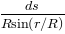

In [4]:
# Ryden 3.2 Cont'd
print ('Taking the square root and rearranging to solve for d\u03B8:')
ds = sp.symbols('ds') # defining sympy var ds to make pretty output
dTheta = ds/(R * sp.sin(r/R))
dTheta

# Now to describe the behavior of dTheta as dTheta --> (pi*R)
# we know when r = (pi*R)/2, dtheta = ds/R
# keeping ds fixed, as r descrease from 0 to (pi*R)/2
# for r > (pi*R)/2, dTheta increases wrt 

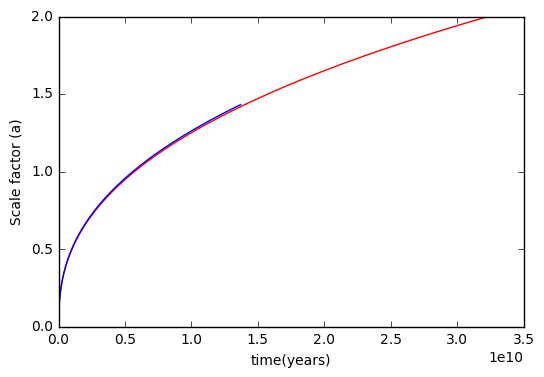

In [10]:
H_o = 70 *u.km*((u.s)**-1)*((u.Mpc)**-1)
# numerical solution

a = np.linspace(0,2,41) # samples a between 0 and 2, [0,0.05];[0.05,0.1];[0.1,0.15]; etc.
t = (2/5)*(a**(5/2))/(H_o) * (10**12) # multiply by 10^12 to get graphs on same scale of Gyrs

fig,ax = plt.subplots(1,1)
ax.plot(t,a,color='r')

# analytical/algebraic solution:
H_o = 70 *u.km*((u.s)**-1)*((u.Mpc)**-1)
t = np.linspace(0,13700000000,1000)*u.yr # time scale from 0 to 13.7 Gyrs, 1000 bins spaced linearly
c=0
a_t = ((5/2)*(H_o*t+c))**(2/5)
ax.plot(t,a_t)
ax.set_xlabel('time(years)')
ax.set_ylabel('Scale factor (a)')
